# Collaboration and Competition

---

This notebook demonstrates the use of Deep-Reinforcement-Learning in Unity environment.

### 1. Start the Environment

Run this code to set up the environment. Note that you may be missing some packages. 
SingleBrainEnv takes a path to a Unity app, in thos case it is Tennis for Linux without visualisations and with multiple agents.

In [1]:
import sys
sys.path.insert(0, '..') # enables the notebook to find the drl module

from os.path import expanduser
from drl.env import EnvHelper
from drl.unity.env import SingleBrainEnv
import drl.hyperparams as hp
import drl.agent.DDPG as ddpg
import torch
import numpy as np

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = SingleBrainEnv(expanduser("~") + '/Tennis_Linux_NoVis/Tennis.x86_64')
helper = EnvHelper(env, save_best=True, agent_score_f=np.max)
conf = list(hp.hyper_space_ns({'seed': [101]}))[0]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 2. Choosing the best agent (hyperparameter optimization)
In the next cell we will try to choose some agents by searching the hyperparameter space

0 --------------------------------------------------------------
{'batch_size': 64, 'buffer_size': 100000, 'seed': 0, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 0.0001, 'lr_a': 0.0001, 'gamma': 0.99, 'tau': 0.001, 's_dim': 24, 'a_dim': 2, 'custom_acn': True, 'a_l_dims': (24, 256, 2), 'c_l_dims': (24, 256, 256, 256, 128, 1)}
Episode 1000	Agent Score 100: 0.01	Agent Score 10: 0.01	Score: 0.00	Steps: 14	#####
Episode 1842	Agent Score 100: 0.52	Agent Score 10: 1.01	Score: 2.60	Steps: 1001	#####
1 --------------------------------------------------------------
{'batch_size': 64, 'buffer_size': 100000, 'seed': 100, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 0.0001, 'lr_a': 0.0001, 'gamma': 0.99, 'tau': 0.001, 's_dim': 24, 'a_dim': 2, 'custom_acn': True, 'a_l_dims': (24, 256, 2), 'c_l_dims': (24, 256, 256, 256, 128, 1)}
Episode 1000	Agent Score 100: 0.00	Agent Score 10: 0.00	Score: 0.00	Steps: 14	#####
Episode 2000	Agent Score 100: 0.45	Agent Score 10: 0.49	Score: 0.30	Steps: 138	#####
Episode 2159	Agent Score 100:

Episode 1000	Agent Score 100: 0.00	Agent Score 10: 0.00	Score: 0.00	Steps: 14	#####
Episode 2000	Agent Score 100: 0.15	Agent Score 10: 0.13	Score: 0.20	Steps: 103	#####
Episode 2856	Agent Score 100: 0.51	Agent Score 10: 0.82	Score: 1.50	Steps: 585	######
13 --------------------------------------------------------------
{'batch_size': 64, 'buffer_size': 100000, 'seed': 100, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 0.0001, 'lr_a': 1e-05, 'gamma': 0.99, 'tau': 0.001, 's_dim': 24, 'a_dim': 2, 'custom_acn': True, 'a_l_dims': (24, 256, 2), 'c_l_dims': (24, 256, 256, 256, 128, 1)}
Episode 1000	Agent Score 100: 0.00	Agent Score 10: 0.00	Score: 0.00	Steps: 14	#####
Episode 2000	Agent Score 100: 0.08	Agent Score 10: 0.10	Score: 0.20	Steps: 70	######
Episode 2797	Agent Score 100: 0.51	Agent Score 10: 0.51	Score: 0.30	Steps: 128	######
14 --------------------------------------------------------------
{'batch_size': 64, 'buffer_size': 100000, 'seed': 0, 'wd_a': 0, 'wd_c': 0.0, 'lr_c': 1e-05, 'lr_a': 1e-05, 

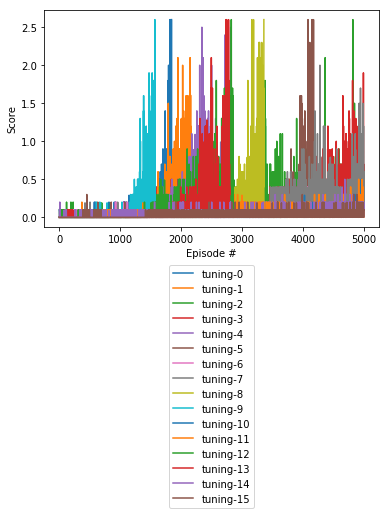

In [4]:
parameters = {
    'seed': [0, 100],
    'batch_size': [64],
    'lr_c': [1e-4, 1e-5],
    'lr_a': [1e-4, 1e-5],
    'wd_c': [1e-4, 0]
}

for idx, conf in enumerate(hp.hyper_space_ns(parameters)):
    print('%d --------------------------------------------------------------' % idx)
#     conf.batch_size = 1024
    conf.buffer_size = int(1e5)
    conf.wd_c = 0.0
    conf.s_dim = env.get_state_dim() 
    conf.a_dim = env.get_action_dim()
    
    conf.custom_acn = True
    conf.a_l_dims = (conf.s_dim, 256, conf.a_dim)
    conf.c_l_dims = (conf.s_dim, 256, 256, 256, 128, 1)
    
    print(conf)
    helper.set_agents(ddpg.Agent(conf, device, env.get_num_agents()), 'tuning-%d' % idx)
    helper.run_until(episodes=5000, print_every=1000, target_mean_reward=0.51)
    print()
helper.show_plot()

Sixteen agents were tested during the hyperparameter space search. The plot below shows the reward averaged over one hundred steps. Eight of the agents were able to solve the environment in under 5000 episodes.

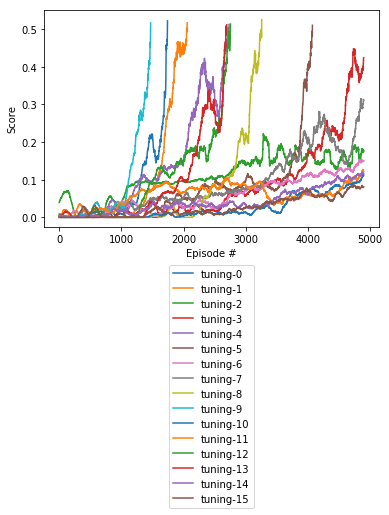

In [10]:
helper.show_plot(mode="average=100")

When finished, you can close the environment.

In [7]:
env.close()